# Spatial Weights


Spatial weights are mathematical structures used to represent spatial relationships. Many spatial analytics, such as spatial autocorrelation statistics and regionalization algorithms rely on spatial weights. Generally speaking, a spatial weight $w_{i,j}$ expresses the notion of a geographical relationship between locations $i$ and $j$. These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

libpysal offers functionality for the construction, manipulation, analysis, and conversion of a wide array of spatial weights.

We begin with construction of weights from common spatial data formats.


In [1]:
import libpysal 
from libpysal.weights import Queen, Rook, KNN, Kernel
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

There are functions to construct weights directly from a file path. 

## Weight Types

### Contiguity

#### Queen Weights

A commonly-used type of weight is a queen contigutiy weight, which reflects adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. These weights are symmetric, in that when polygon $A$ neighbors polygon $B$, both $w_{AB} = 1$ and $w_{BA} = 1$.

To construct queen weights from a shapefile, we will use geopandas to read the file into a GeoDataFrame, and then use   libpysal to construct the weights:

In [2]:
shp_path = "data/texas.shp"
df = geopandas.read_file(shp_path)
df.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,POLYGON ((-100.0068664550781 36.49387741088867...
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,POLYGON ((-102.1675720214844 36.05462646484375...
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,POLYGON ((-102.1675720214844 36.05462646484375...
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.619499206543 36.05471038818359,..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.0823135375977 36.0562629699707,..."


In [3]:
qW = Queen.from_dataframe(df)

In [4]:
qW

All weights objects have a few traits that you can use to work with the weights object, as well as to get information about the weights object. 

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [5]:
qW[155] #neighbors & weights of the 156th observation (0-index remember)

{159: 1.0, 154: 1.0, 138: 1.0, 139: 1.0, 171: 1.0, 127: 1.0}

By default, the weights and the pandas dataframe will use the same index. So, we can view the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list:

In [6]:
self_and_neighbors = [155]
self_and_neighbors.extend(qW.neighbors[155])
print(self_and_neighbors)

[155, 159, 154, 138, 139, 171, 127]


and grabbing those elements from the dataframe:

In [7]:
df.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
155,Lampasas,Texas,48,281,48281,48,281,48281,1,0.000000,...,1.982102,0.335017,0.402855,0.390354,0.393445,10.989441,7.8,8.652695,12.023460,POLYGON ((-97.91265106201172 31.04269218444824...
159,Bell,Texas,48,027,48027,48,27,48027,1,4.959421,...,18.889203,0.296351,0.378957,0.382181,0.386888,9.810410,8.2,10.025676,13.709190,"POLYGON ((-97.83271026611328 30.9168701171875,..."
154,San Saba,Texas,48,411,48411,48,411,48411,1,5.223842,...,0.259211,0.374866,0.469212,0.412534,0.447820,9.497207,9.0,7.595660,11.317009,"POLYGON ((-98.95845031738281 30.9235668182373,..."
138,Mills,Texas,48,333,48333,48,333,48333,1,7.462130,...,0.220702,0.378945,0.424433,0.372892,0.399459,8.283582,6.2,5.760709,7.267222,POLYGON ((-98.56594848632812 31.23529052734375...
139,Coryell,Texas,48,099,48099,48,99,48099,1,2.782299,...,21.167053,0.314801,0.354336,0.351261,0.335440,7.955449,8.0,7.230444,9.554187,POLYGON ((-97.90811157226562 31.07367515563965...
171,Burnet,Texas,48,053,48053,48,53,48053,1,0.000000,...,1.186224,0.327508,0.449285,0.385079,0.405890,10.774142,6.5,7.115629,10.568742,POLYGON ((-98.34817504882812 30.49784851074219...
127,Hamilton,Texas,48,193,48193,48,193,48193,1,0.000000,...,0.025863,0.384394,0.411167,0.405745,0.431276,10.249307,8.1,5.316150,10.190217,POLYGON ((-98.17922973632812 31.46478271484375...


A full, dense matrix describing all of the pairwise relationships is constructed using the `.full` method, or when `libpysal.weights.full` is called on a weights object:

In [8]:
Wmatrix, ids = qW.full()
#Wmatrix, ids = libpysal.weights.full(qW)

In [9]:
Wmatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [10]:
n_neighbors = Wmatrix.sum(axis=1) # how many neighbors each region has

In [11]:
n_neighbors[155]

6.0

In [12]:
qW.cardinalities[155]

6

Note that this matrix is binary, in that its elements are either zero or one, since an observation is either a neighbor or it is not a neighbor. 

However, many common use cases of spatial weights require that the matrix is row-standardized. This is done simply in PySAL using the `.transform` attribute

In [13]:
qW.transform = 'r'

Now, if we build a new full matrix, its rows should sum to one:

In [14]:
Wmatrix, ids = qW.full()

In [15]:
Wmatrix.sum(axis=1) #numpy axes are 0:column, 1:row, 2:facet, into higher dimensions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Since weight matrices are typically very sparse, there is also a sparse weights matrix constructor:

In [16]:
qW.sparse

<254x254 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [17]:
qW.pct_nonzero #Percentage of nonzero neighbor counts

2.263004526009052

Let's look at the neighborhoods of the 101th observation - Howard County, Texas

In [18]:
df.iloc[100]

NAME                                                     Howard
STATE_NAME                                                Texas
STATE_FIPS                                                   48
CNTY_FIPS                                                   227
FIPS                                                      48227
STFIPS                                                       48
COFIPS                                                      227
FIPSNO                                                    48227
SOUTH                                                         1
HR60                                                    9.96537
HR70                                                     12.347
HR80                                                    23.1328
HR90                                                    11.3368
HC60                                                          4
HC70                                                    4.66667
HC80                                    

In [19]:
qW.neighbors[100]

[84, 101, 85, 86, 104, 117, 118]

In [20]:
len(qW.neighbors[100])

7

In [21]:
df.iloc[qW.neighbors[100]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
84,Scurry,Texas,48,415,48415,48,415,48415,1,3.272947,...,4.717184,0.257733,0.377475,0.378368,0.387530,7.060163,6.6,8.370385,9.228223,"POLYGON ((-100.663330078125 32.52182388305664,..."
101,Mitchell,Texas,48,335,48335,48,335,48335,1,2.961647,...,4.528443,0.308195,0.427075,0.429193,0.429171,8.922323,8.0,10.425615,12.516945,POLYGON ((-100.6694717407227 32.08793640136719...
85,Borden,Texas,48,033,48033,48,33,48033,1,92.936803,...,0.250313,0.316676,0.331702,0.430273,0.410525,5.574913,3.1,2.723735,4.602510,POLYGON ((-101.1782684326172 32.52310943603516...
86,Dawson,Texas,48,115,48115,48,115,48115,1,8.687343,...,4.334797,0.319099,0.450096,0.400927,0.441837,9.756098,7.8,6.738980,12.069864,POLYGON ((-101.6899566650391 32.52256393432617...
104,Martin,Texas,48,317,48317,48,317,48317,1,0.000000,...,1.795803,0.271493,0.431611,0.431032,0.414783,8.448416,6.8,3.228410,7.948524,"POLYGON ((-101.7743606567383 32.0882682800293,..."
117,Sterling,Texas,48,431,48431,48,431,48431,1,28.320589,...,0.000000,0.322944,0.401901,0.423753,0.391542,8.888889,7.8,8.823529,8.549223,POLYGON ((-101.2693634033203 31.65358352661133...
118,Glasscock,Texas,48,173,48173,48,173,48173,1,0.000000,...,0.000000,0.255656,0.447957,0.473217,0.415726,5.653710,3.8,2.424242,5.660377,POLYGON ((-101.2693634033203 31.65358352661133...


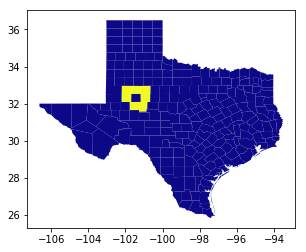

In [22]:
df.assign(weights = qW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')           

By default, PySAL assigns each observation an index according to the order in which the observation was read in. This means that, by default, all of the observations in the weights object are indexed by table order.

#### Rook Weights

Rook weights are another type of contiguity weight, but consider observations as neighboring only when they share an edge. The rook neighbors of an observation may be different than its queen neighbors, depending on how the observation and its nearby polygons are configured. 

We can construct this in the same way as the queen weights:

In [23]:
rW = Rook.from_dataframe(df)

In [24]:
rW.neighbors[100]

[101, 85, 118, 104, 117]

In [25]:
len(rW.neighbors[100])

5

In [26]:
df.iloc[rW.neighbors[100]]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
101,Mitchell,Texas,48,335,48335,48,335,48335,1,2.961647,...,4.528443,0.308195,0.427075,0.429193,0.429171,8.922323,8.0,10.425615,12.516945,POLYGON ((-100.6694717407227 32.08793640136719...
85,Borden,Texas,48,033,48033,48,33,48033,1,92.936803,...,0.250313,0.316676,0.331702,0.430273,0.410525,5.574913,3.1,2.723735,4.602510,POLYGON ((-101.1782684326172 32.52310943603516...
118,Glasscock,Texas,48,173,48173,48,173,48173,1,0.000000,...,0.000000,0.255656,0.447957,0.473217,0.415726,5.653710,3.8,2.424242,5.660377,POLYGON ((-101.2693634033203 31.65358352661133...
104,Martin,Texas,48,317,48317,48,317,48317,1,0.000000,...,1.795803,0.271493,0.431611,0.431032,0.414783,8.448416,6.8,3.228410,7.948524,"POLYGON ((-101.7743606567383 32.0882682800293,..."
117,Sterling,Texas,48,431,48431,48,431,48431,1,28.320589,...,0.000000,0.322944,0.401901,0.423753,0.391542,8.888889,7.8,8.823529,8.549223,POLYGON ((-101.2693634033203 31.65358352661133...


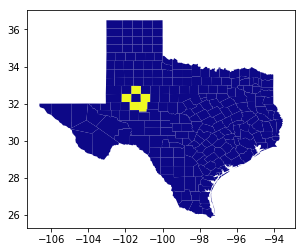

In [27]:
df.assign(weights = rW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

#### Bishop Weights

In theory, a "Bishop" weighting scheme is one that arises when only polygons that share vertexes are considered to be neighboring. But, since Queen contiguigy requires either an edge or a vertex and Rook contiguity requires only shared edges, the following relationship is true:

$$ \mathcal{Q} = \mathcal{R} \cup \mathcal{B} $$

where $\mathcal{Q}$ is the set of neighbor pairs *via* queen contiguity, $\mathcal{R}$ is the set of neighbor pairs *via* Rook contiguity, and $\mathcal{B}$ *via* Bishop contiguity. Thus:

$$ \mathcal{Q} \setminus \mathcal{R} = \mathcal{B}$$

Bishop weights entail all Queen neighbor pairs that are not also Rook neighbors.

PySAL does not have a dedicated bishop weights constructor, but you can construct very easily using the `w_difference` function. This function is one of a family of tools to work with weights, all defined in `libpysal.weights`, that conduct these types of set operations between weight objects.

In [28]:
bW = libpysal.weights.w_difference(qW, rW, constrained=False)

/home/serge/anaconda3/envs/workshop18/lib/python3.6/site-packages/libpysal/weights/weights.py:168: UserWarning: There are 161 disconnected observations 
  Island ids: 19, 20, 21, 22, 23, 24, 25, 26, 34, 36, 37, 39, 40, 42, 52, 54, 55, 56, 57, 58, 59, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 102, 103, 107, 108, 109, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 127, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 219, 220, 221, 222, 223, 225, 226, 227, 231, 232, 233, 236, 237, 238, 240, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [29]:
bW = libpysal.weights.w_difference(qW, rW, constrained=False)

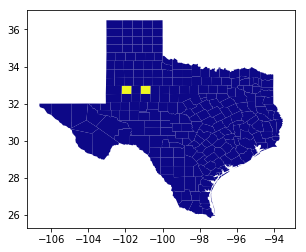

In [30]:
df.assign(weights = bW.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')

In [31]:
bW.histogram

[(0, 161), (1, 48), (2, 33), (3, 8), (4, 4)]

Thus, the vast majority of counties have no bishop neighbors. But, a few do. A simple way to see these observations in the dataframe is to find all elements of the dataframe that are not "islands," the term for an observation with no neighbors:

In [32]:
islands = bW.islands

In [33]:
bW

In [34]:
# Using `.head()` to limit the number of rows printed
df.query('FIPS not in @islands').head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,POLYGON ((-100.0068664550781 36.49387741088867...
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,POLYGON ((-102.1675720214844 36.05462646484375...
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,POLYGON ((-102.1675720214844 36.05462646484375...
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,"POLYGON ((-101.619499206543 36.05471038818359,..."
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,"POLYGON ((-101.0823135375977 36.0562629699707,..."


## Distance

There are many other kinds of weighting functions in PySAL. Another separate type use a continuous measure of distance to define neighborhoods. 

In [35]:
radius_mile = libpysal.cg.sphere.RADIUS_EARTH_MILES
radius_mile

3958.755865744055

great circle (arc) distance -  maximum nearest neighbor distance in miles between the $n$ observations

In [36]:
threshold = libpysal.weights.min_threshold_dist_from_shapefile('data/texas.shp',
                                                               radius=radius_mile) 

In [37]:
threshold

60.47758554135752

In [38]:
radius_km = libpysal.cg.sphere.RADIUS_EARTH_KM
radius_km

6371.0

In [39]:
libpysal.weights.min_threshold_dist_from_shapefile('data/texas.shp',
                                                               radius=radius_km) 

97.32923942547046

In [40]:
libpysal.weights.min_threshold_dist_from_shapefile('data/texas.shp')

1.0040319244447573

### knn defined weights

In [41]:
knn4_bad = KNN.from_dataframe(df, k=4) # ignore curvature of the earth

In [42]:
knn4_bad.histogram

[(4, 254)]

In [43]:
knn4 = KNN.from_dataframe(df, k=4, radius=radius_mile)

In [44]:
knn4.histogram

[(4, 254)]

In [45]:
knn4[0]

{6: 1.0, 4: 1.0, 5: 1.0, 3: 1.0}

In [46]:
knn4_bad[0]

{6: 1.0, 4: 1.0, 5: 1.0, 13: 1.0}

In [47]:
knn4_bad.neighbors == knn4.neighbors

False

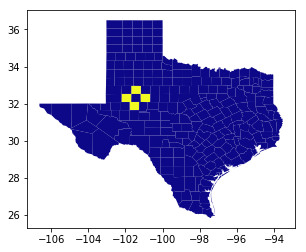

In [48]:

df.assign(weights = 
          knn4_bad.sparse[100,:].toarray().flatten()).plot('weights', 
                                                           cmap='plasma')

### Kernel W

Kernel Weights are continuous distance-based weights that use kernel densities to define the neighbor relationship.
Typically, they estimate a `bandwidth`, which is a parameter governing how far out observations should be considered neighboring. Then, using this bandwidth, they evaluate a continuous kernel function to provide a weight between 0 and 1.

Many different choices of kernel functions are supported, and bandwidths can either be fixed (constant over all units) or adaptive in function of unit density.

For example, if we want to use **adaptive bandwidths for the map and weight according to a gaussian kernel**:

#### Adaptive gaussian kernel weights

bandwidth = the distance to the kth nearest neighbor for each
                  observation
   
bandwith is changing across observations

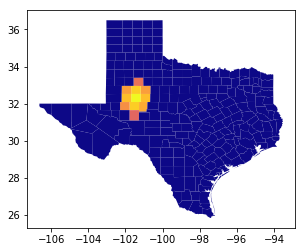

In [49]:
kernelWa = Kernel.from_dataframe(df, k=10, fixed=False, function='gaussian')
df.assign(weights = 
          kernelWa.sparse[100,:].toarray().flatten()).plot('weights', 
                                                           cmap='plasma')

In [50]:
kernelWa.bandwidth

array([[1.41792307],
       [1.16186765],
       [1.51532266],
       [1.16706641],
       [1.16051064],
       [1.02910576],
       [1.17033966],
       [1.02887826],
       [1.31356614],
       [1.0256787 ],
       [0.88773322],
       [0.88526614],
       [0.88179061],
       [1.08662339],
       [1.22270045],
       [0.89732036],
       [0.89442955],
       [1.0327589 ],
       [0.88819223],
       [1.12280474],
       [1.05295281],
       [0.94862185],
       [0.95000665],
       [0.92211746],
       [1.00000484],
       [0.92083932],
       [1.05944729],
       [1.05898297],
       [0.9017759 ],
       [0.90650946],
       [0.90032068],
       [0.89957   ],
       [0.92902449],
       [1.09851391],
       [0.98062729],
       [1.08796014],
       [1.07679596],
       [1.05234301],
       [0.88935744],
       [1.05377653],
       [1.04809952],
       [0.90585612],
       [1.0087307 ],
       [0.88937573],
       [0.92083932],
       [0.92211746],
       [0.92258946],
       [0.965

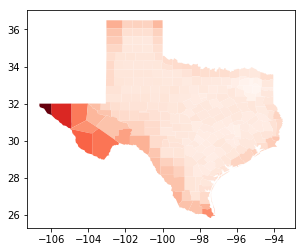

In [51]:
df.assign(bw=kernelWa.bandwidth.flatten()).plot('bw', cmap='Reds')

**fixed bandwidths for the map and weight according to a gaussian kernel**

bandwidth = maximum of (the distances to the kth nearest neighbor for all observations)

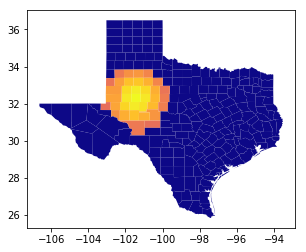

In [52]:
kernelWa = Kernel.from_dataframe(df, k=2, fixed=True, function='gaussian')

df.assign(weights=kernelWa.sparse[100,:].toarray().flatten()).plot('weights', cmap='plasma')


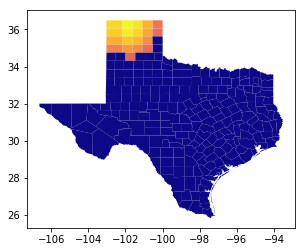

In [53]:
kernelWa = Kernel.from_dataframe(df, k=2, fixed=True, function='gaussian')

df.assign(weights=kernelWa.sparse[1,:].toarray().flatten()).plot('weights', cmap='plasma')

In [54]:
kernelWa.bandwidth

array([[1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.75504473],
       [1.755

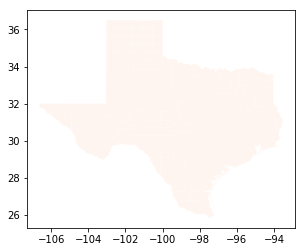

In [55]:
df.assign(bw=kernelWa.bandwidth.flatten()).plot('bw', cmap='Reds')

## Exercise

1. Answer this question before writing any code: What spatial weights structure would be more dense, Texas counties based on rook contiguity or Texas counties based on knn with k=4?
2. Why?
3. Write code to see if you are correct.

## Solution

In [56]:
from libpysal.weights import Rook, KNN
wrk = Rook.from_shapefile("data/texas.shp")

In [57]:
wrk.pct_nonzero

2.0243040486080974

In [58]:
wk4 = KNN.from_shapefile("data/texas.shp", k=4)
wk4.pct_nonzero

1.5748031496062993